Importamos las funciones requeridas.

In [2]:
import sys
import os
from math import sin, cos, pi
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from generator import generate
from runner import correr_instancia
from isotherm import isotherm_abs, isotherm_lin, isotherm_lin2
from risk import run_risks
from graph  import read_input, temp_graph, temp_graph_bilin, iso_graph, risk_graph

Experimento 4.3.2 $EG$ vs $LU$ con $n\cdot m$ creciente.

Generamos las instancias

In [ ]:
instancia = f'normal/nm'
for (n, m) in [(n, n) for n in range(5, 51)]:
    generate(instancia, f"normal_{n}", 1, 2, n, m, 500, 1, [lambda t : 1500], [lambda t : np.random.normal(250, 125)])

Resolvemos las instancias

In [ ]:
distribucion = 'normal'
instancia = f'{distribucion}/nm'
path_tiempos = f"../../output/{instancia}/"
for n in range(5, 51):
    runs = 50
    if (os.path.isfile(path_tiempos+f"normal_{n}_EG.time")):
        open(path_tiempos+f"normal_{n}_EG.time", "w").close()
    if (os.path.isfile(path_tiempos+f"normal_{n}_LU.time")):
        open(path_tiempos+f"normal_{n}_LU.time", "w").close()
    for j in range(runs):
        correr_instancia('temperatura', instancia, f'normal_{n}', 'EG')
        correr_instancia('temperatura', instancia, f'normal_{n}', 'LU')
    print('finish', n)

Graficamos

             time     n método
0           23739    25     LU
1           38005    25     LU
2           23490    25     LU
3           36507    25     LU
4           23075    25     LU
...           ...   ...    ...
2295  18552706718  2500     LU
2296  18847954144  2500     LU
2297  19848075905  2500     LU
2298  17450886415  2500     LU
2299  16907356662  2500     LU

[2300 rows x 3 columns]


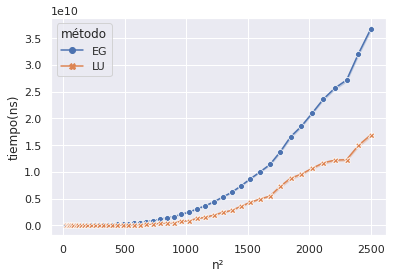

In [3]:
distribucion = 'normal'
instancia = f'{distribucion}/nm'
path_tiempos = f"../../output/{instancia}/"
datapoints = []
eg = pd.DataFrame([])  
for n in range(5, 51):
    n_eg = pd.read_csv(path_tiempos+f'{distribucion}_{n}_EG.time')
    n_eg['n'] = [n*n]*len(n_eg)
    eg = pd.concat([eg, n_eg], axis=0).drop_duplicates().reset_index(drop=True)
eg['método'] = ['EG']*len(eg)

lu = pd.DataFrame([])  
for n in range(5, 51):
    n_lu = pd.read_csv(path_tiempos+f'{distribucion}_{n}_LU.time')
    n_lu['n'] = [n*n]*len(n_lu)
    lu = pd.concat([lu, n_lu], axis=0).drop_duplicates().reset_index(drop=True)
lu['método'] = ['LU']*len(lu)

print(lu)

times = pd.concat([eg, lu], axis=0).drop_duplicates().reset_index(drop=True)

sns.set_theme()
ax = sns.lineplot(
    data=times,
    x='n', y='time', hue='método', style='método',
    markers=True, dashes=False
)
ax.set(xlabel='n²', ylabel='tiempo(ns)')
#plt.yscale('log')
plt.savefig('EG_vs_LU_nm_nl.pdf')

In [ ]:

temp_graph('normal/instancias', 'normal_3')
temp_graph_bilin('normal/instancias', 'normal_3')